**SOFT DEADLINE:** `20.03.2022 23:59 msk` 

# [5 points] Part 1. Data cleaning

The task is to clear the text data of the crawled web-pages from different sites. 

It is necessary to ensure that the distribution of the 100 most frequent words includes only meaningful words in english language (not particles, conjunctions, prepositions, numbers, tags, symbols).

Determine the order of operations below and carry out the appropriate cleaning.

1. Remove non-english words
1. Remove html-tags (try to do it with regular expression, or play with beautifulsoap library)
1. Apply lemmatization / stemming
1. Remove stop-words
1. Additional processing - At your own initiative, if this helps to obtain a better distribution

#### Hints

1. To do text processing you may use nltk and re libraries
1. and / or any other libraries on your choise

#### Data reading

The dataset for this part can be downloaded here: `https://drive.google.com/file/d/1wLwo83J-ikCCZY2RAoYx8NghaSaQ-lBA/view?usp=sharing`

In [108]:
import pandas as pd
data = pd.read_csv('web_sites_data.csv')

data.head()

,text
0,"<html>\n<head profile=""http://www.w3.org/2005/..."
1,"<html>\n<head profile=""http://www.w3.org/2005/..."
2,"<html>\n<head profile=""http://www.w3.org/2005/..."
3,"<html>\n<head profile=""http://www.w3.org/2005/..."
4,"<html>\n<head profile=""http://www.w3.org/2005/..."


#### Data processing

In [109]:
import nltk
import string
import re
from nltk.tokenize import TreebankWordTokenizer, WhitespaceTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
from bs4 import BeautifulSoup
import html
from tqdm import tqdm

stop_words = stopwords.words("english")

data_list = [i.lower() for i in data['text']]
pre_data = data_list.copy()

for i in tqdm(range(len(data_list))):
    
    temp = BeautifulSoup(html.unescape(pre_data[i]), 'html.parser').text #Remove html-tags
    pre_data[i] = re.sub(r'\n+', '\n', temp)
    pre_data[i] = re.sub(r'https?://\S+|www\.\S+', '', pre_data[i])
    pre_data[i] = re.sub("[^a-zA-Z ]+", " ", pre_data[i]) # Remove non-english words
    pre_data[i] = re.sub(r"[^\w\s]", "", pre_data[i], re.UNICODE)
    pre_data[i] = WhitespaceTokenizer().tokenize(pre_data[i])
    pre_data[i] = [token for token in pre_data[i] if token not in stop_words and len(token)>3] #Remove stop-words
    pre_data[i] = [WordNetLemmatizer().lemmatize(token) for token in pre_data[i]]


100%|██████████| 71699/71699 [7:00:38<00:00,  2.84it/s]      


In [110]:
for i in tqdm(range(len(pre_data))):
    with open('predata.txt', 'a') as file:
        file.write(' '.join(pre_data[i]) + '\n')

100%|██████████| 71699/71699 [00:03<00:00, 18437.26it/s]


In [111]:
# pre_data = []
# with open('predata.txt', 'r') as file:
#     for line in file:
#         pre_data.append(line.split())

#### Vizualization

As a visualisation, it is necessary to construct a frequency distribution of words (the 100 most common words), sorted by frequency. 

For visualization purposes we advice you to use plotly, but you are free to choose other libraries

In [112]:
from collections import Counter

counter = Counter()

for words in pre_data:
    counter.update(Counter(words))

top = counter.most_common(100)
top[:15]

[('game', 625901),
 ('xbox', 381511),
 ('review', 249977),
 ('news', 223887),
 ('player', 188851),
 ('stock', 185837),
 ('cnet', 139757),
 ('quote', 137459),
 ('site', 134901),
 ('home', 134875),
 ('video', 130681),
 ('market', 118560),
 ('time', 118528),
 ('world', 112758),
 ('product', 97439)]

In [113]:
import pandas as pd
df_top = pd.DataFrame(top, columns=['word', 'freq'])
df_top.head()

,word,freq
0,game,625901
1,xbox,381511
2,review,249977
3,news,223887
4,player,188851


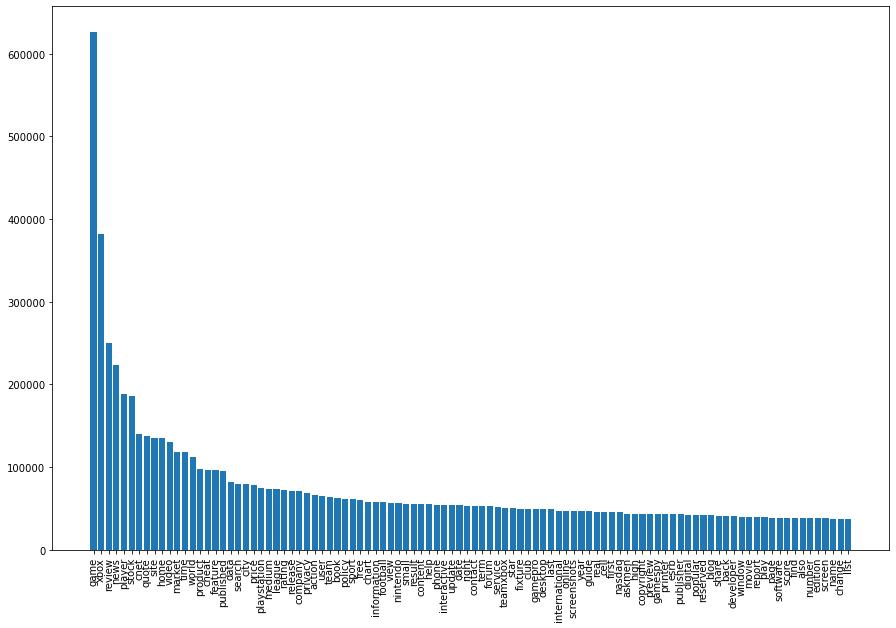

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.bar(df_top['word'],df_top['freq'])
plt.xticks(rotation=90)

plt.show()


#### Provide examples of processed text (some parts)

Is everything all right with the result of cleaning these examples? What kind of information was lost?

In [115]:
data['text'][0][:1000]

'<html>\n<head profile="http://www.w3.org/2005/10/profile">\n<LINK REL="SHORTCUT ICON" href="http://i.bookmooch.com/favicon.ico"> \n<link rel="icon" type="image/png" href="http://i.bookmooch.com/favicon.png">\n<title>Eric Newby : Love and War in the Apennines</title>\n<meta http-equiv="Content-Type" content="text/html">\n\t\n</head>\n<body bgcolor="#FFFFFF" leftmargin="0" topmargin="0" marginwidth="0" marginheight="0" text="#000000" link="#0000FF" vlink="#0000FF" alink="#FF0000" >\n<basefont face="arial, sans-serif"><font face="arial, sans-serif">\n<table width="100%" height="70" border="0" cellpadding="0" cellspacing="0">\n\t<tr><form action="/search" method="get">\n\t\t<td width="283" colspan="2" rowspan="2" bgcolor="#689A9B">\n\t\t\t<a href="/">\n\t\t\t\t<img src="http://i.bookmooch.com/images/bookmooch_logo.gif" width="283" height="66" border="0" alt="BookMooch logo"></a></td>\n\t\t<td width="675" height="38" colspan="9" align="right" bgcolor="#689A9B" xcolor="#689A9B">\n\t\t\n<tab

In [116]:
' '.join(pre_data[0][:1000])

'eric newby love apennines eric newby love apennines author eric newby title love apennines moochable copy copy available amazon suggests short walk hindu kushslowly gangeson shore mediterraneanthe last grain raceround ireland gear recommended bookmooch bookmooch bookmark show recommendation topic abridgedancientasiaaudiobooksbiographies memoirsbiographies memoir generalbooks cassetteeastern frontedition format europeflorencehiroshima nagasakihistoryhistory europe generalhistory europe italy generalhome frontintelligence operationsitalyiwo jimamedievalmilanmilitarynaplesnavalnormandypearl harborpersonal narrativesreferencerefinementsrenaissanceromesardiniasicilystalingradtraveltravel europe italy generaltuscanyumbriavenicewestern frontwomenworld iiwriting published english binding audio cassette page date isbn publisher harpercollins audio weight pound size inch edition abridged amazon price previous giver jessierey previous moocher wishlists description book description italy made pea

# [10 points] Part 2. Duplicates detection. LSH

#### Libraries you can use

1. LSH - https://github.com/ekzhu/datasketch
1. LSH - https://github.com/mattilyra/LSH
1. Any other library on your choise

1. Detect duplicated text (duplicates do not imply a complete word-to-word match, but texts that may contain a paraphrase, rearrangement of words, sentences)
1. Make a plot dependency of duplicates on shingle size (with fixed minhash length) 
1. Make a plot dependency of duplicates on minhash length (with fixed shingle size)

In [117]:
def shringl(s, l = 5):
    return [s[i:i+l] for i in range(len(s))][:-l]


In [118]:
from datasketch import MinHash, MinHashLSH

def lsh_similar(minhashes,num_perm):
    lsh = MinHashLSH(num_perm=num_perm)
    for i, mh in enumerate(tqdm(minhashes)):
        # Check if duplicate of already seen item
        for j in lsh.query(mh):
            yield (j, i)
        # Add to the seen items
        lsh.insert(i, mh)

shr_sizes = [5,10,15,20,25]
num_perm = 50
duplicates = []
for shr_size in shr_sizes:
    minhashes = []
    for s in pre_data: 
        s = ' '.join(s) 
        shr = shringl(s,shr_size)
        m = MinHash(num_perm=num_perm)
        for d in shr:
            m.update(d.encode('utf8'))
        minhashes.append(m)
    similar_all = list(lsh_similar(minhashes,num_perm))
    duplicates.append(len(similar_all))


plt.bar(shr_sizes,duplicates)
plt.ylabel('Number of duplicates')
plt.xlabel('Shringle size')


100%|██████████| 500/500 [00:00<00:00, 41411.32it/s]


Text(0.5, 0, 'Minhash num_perm')

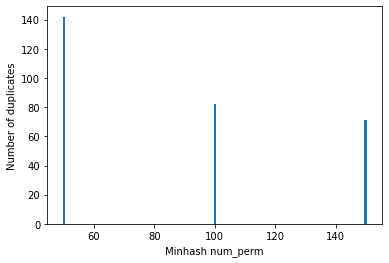

In [ ]:
shr_size = 10
num_perms = [50,100,150,200,250]
duplicates = []
for num_perm in num_perms:
    minhashes = []
    for s in pre_data: 
        s = ' '.join(s) 
        shr = shringl(s,shr_size)
        m = MinHash(num_perm=num_perm)
        for d in shr:
            m.update(d.encode('utf8'))
        minhashes.append(m)
    similar_all = list(lsh_similar(minhashes,num_perm))
    duplicates.append(len(similar_all))


plt.bar(num_perms,duplicates)
plt.ylabel('Number of duplicates')
plt.xlabel('Minhash num_perm')

# [Optional 10 points] Part 3. Topic model

In this part you will learn how to do topic modeling with common tools and assess the resulting quality of the models. 

The provided data contain chunked stories by Edgar Allan Poe (EAP), Mary Shelley (MWS), and HP Lovecraft (HPL).

The dataset can be downloaded here: `https://drive.google.com/file/d/14tAjAzHr6UmFVFV7ABTyNHBh-dWHAaLH/view?usp=sharing`

#### Preprocess dataset with the functions from the Part 1

#### Quality estimation

Implement the following three quality fuctions: `coherence` (or `tf-idf coherence`), `normalized PMI`, `based on the distributed word representation`(you can use pretrained w2v vectors or some other model). You are free to use any libraries (for instance gensim) and components.

### Topic modeling

Read and preprocess the dataset, divide it into train and test parts `sklearn.model_selection.train_test_split`. Test part will be used in classification part. For simplicity we do not perform cross-validation here, but you should remember about it.

Plot the histogram of resulting tokens counts in the processed datasets.

Plot the histogram of resulting tokens counts in the processed datasets.

#### NMF

Implement topic modeling with NMF (you can use `sklearn.decomposition.NMF`) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

#### LDA

Implement topic modeling with LDA (you can use gensim implementation) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

### Additive regularization of topic models 

Implement topic modeling with ARTM. You may use bigartm library (simple installation for linux: pip install bigartm) or TopicNet framework (`https://github.com/machine-intelligence-laboratory/TopicNet`)

Create artm topic model fit it to the data. Try to change hyperparameters (number of specific and background topics) to better fit the dataset. Play with smoothing and sparsing coefficients (use grid), try to add decorrelator. Print out resulting topics.

Write a function to convert new documents to topics probabilities vectors.

Calculate the quality scores for each model. Make a barplot to compare the quality.